# Data Exploration

The goal is to identify metastatic cancer in small image patches taken from larger digital pathology scans.

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import os

In [43]:
TRAIN_PATH = "data/train/"
TEST_PATH = "data/test/"

### What data de we have?

In [12]:
training_data = os.listdir(TRAIN_PATH)

In [13]:
len(training_data)

220025

In [4]:
test_data = os.listdir(TEST_PATH)

In [5]:
len(test_data)

57458

Whe have 220,025 training images adn 57,458 test images

### Training Labels

In [6]:
c = pd.read_csv("data/train_labels.csv")

In [7]:
training_labels.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


## Data Distribution

In [8]:
label_counts = training_labels.groupby(['label'], as_index=False).count()

In [9]:
label_counts

,label,id
0,0,130908
1,1,89117


### Bar plot of Positive and Negative example

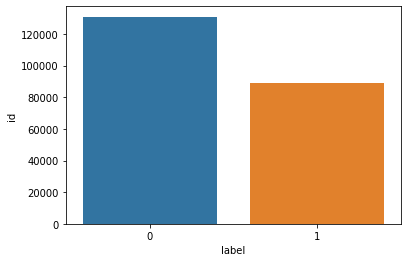

In [10]:
sns.barplot(y='id', x='label', data=label_counts)

## Images Visualization

In [47]:
def read_tif_image(path):
    raw_image = cv2.imread(path)
    b,g,r = cv2.split(raw_image)
    return cv2.merge([r,g,b])

In [52]:
positive_examples = training_labels[training_labels['label'] == 1]
negative_examples = training_labels[training_labels['label'] == 0]

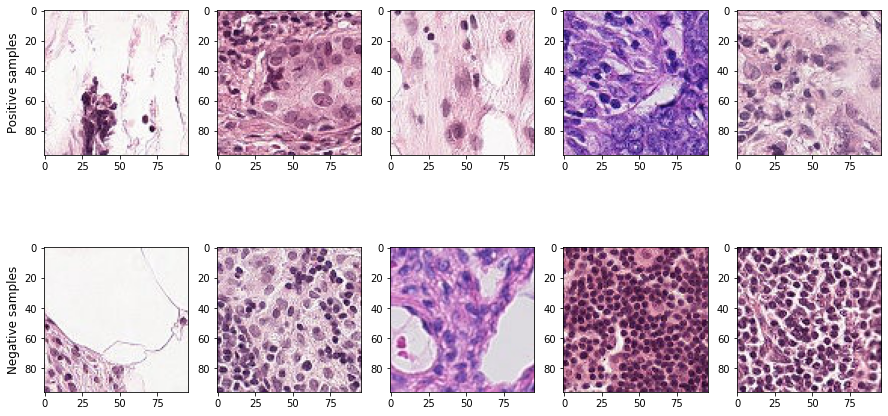

In [55]:
fix, ax = plt.subplots(2,5, figsize=(15,8))

ax[0,0].set_ylabel('Positive samples', size='large')
ax[1,0].set_ylabel('Negative samples', size='large')
# Positive
for i, image in enumerate(positive_examples['id'][:5]):
    image_path = TRAIN_PATH + image + ".tif"
    ax[0,i].imshow(read_tif_image(image_path))
    
#Negative   
for i, image in enumerate(negative_examples['id'][:5]):
    image_path = TRAIN_PATH + image + ".tif"
    ax[1,i].imshow(read_tif_image(image_path))